# Python Homework 3

**Release date:** Saturday, May 9<br>
**Due date:** Friday, May 22, at midnight via <font color="blue">Gradescope</font> 

**Instruction:** Please upload your jupyter notebook on <font color="blue">Gradescope</font> with filename __PythonHW3_YOURPERMNUMBER.ipynb__.


Load some packages:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Problem 1 (10 Points)

1. Simulate three different paths (realizations) of a standard Brownian motion on $[0,1]$ and plot your results in one graph.

_Hint:_ Discretize the time interval $[0,1]$ in sufficiently small subintervals of same length with stepsize $1/n$, i.e., choose a sufficiently large number of steps $n$ (e.g., $n=10000$). 


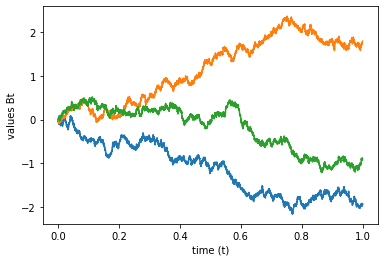

In [2]:
def SBM(T,n):
    Bt = np.random.standard_normal(size = n) 
    Bt = np.cumsum(Bt)*np.sqrt(T/n)
    return Bt
SBM(1,10000)

np.random.seed(2)
time = np.linspace(0, 1, 10000)
plt.xlabel('time (t)')
plt.ylabel('values Bt')
plt.plot(time,SBM(1,10000))
plt.plot(time,SBM(1,10000))
plt.plot(time,SBM(1,10000))
plt.show()

2. A two-dimensional (standard) Brownian motion $(B_t)_{t \geq 0} = ((B^1_t, B^2_t))_{t \geq 0}$ with values in $\mathbb{R}^2$ is given by two one-dimensional $\mathbb{R}$-valued independent (standard) Brownian motions $(B^1_t)_{t \geq 0}$ and $(B^2_t)_{t \geq 0}$. Simulate a realization of a two-dimensional (standard) Brownian motion on the $\mathbb{R}^2$ plane for $t$ running from $0$ to $1$ and plot your result.

<i>Hint:</i> You can use your implementation from 1.

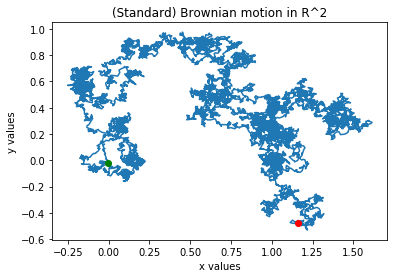

In [3]:
x = SBM(1, 10000)
y = SBM(1, 10000)
plt.plot(x,y) #plotting both of the SBM

plt.plot(x[0],y[0], 'go') #starts 
plt.plot(x[-1], y[-1], 'ro') #stops

plt.title('(Standard) Brownian motion in R^2')
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

## Problem 2 (10 Points)

Let $(B_t)_{t \geq 0}$ be a standard Brownian motion. For $\mu \in \mathbb{R}$ and $\sigma \in \mathbb{R}_+$, the process $(X_t)_{t \geq 0}$ defined by 

$$ X_t = \mu t + \sigma B_t \qquad (t \geq 0)$$

is called __Brownian motion with drift parameter $\mu$ and variance parameter $\sigma^2$__. Moreover, the process $(S_t)_{t \geq 0}$ defined by 

$$ S_t = S_0 \cdot e^{X_t} \qquad (t \geq 0)$$

with starting value $S_0 > 0$ is called __geometric Brownian motion__.



1. Simulate a path of a geometric Brownian motion $(S_t)_{0 \leq t \leq T}$ with parameters $\mu = 0.1, \sigma = 0.176, S_0 = 1125$ on the time interval $[0,5/12]$ (i.e. $T=5/12$). Plot the result.

_Hint:_ Similar to Problem 1 above, discretize the time interval $[0,5/12]$ in sufficiently small subintervals of same length with stepzise $T/n$ (e.g., $n=10000$).  

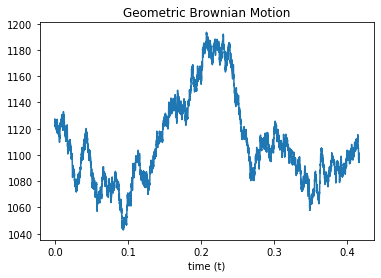

In [4]:
def GBM(So, mu, sigma, T, n):    
    t = np.linspace(0, T, n)
    drift = (mu - 0.5 * sigma**2) * t #Formula for drift for each 10,000 realizations in [0,5/12]
    Bt = np.random.standard_normal(size = n) 
    Bt = np.cumsum(Bt)*np.sqrt(T/n)
    St = So*np.exp(drift + sigma*Bt) #equation for St stated above
    return St
sol = GBM(1125,0.1,0.176,5/12,10000)

time = np.linspace(0, 5/12, 10000) #evenly spaced time 10,000 realizations on [0,5/12] interval
plt.xlabel('time (t)')

plt.title('Geometric Brownian Motion')
plt.plot(time, sol)


2. In the model introduced by Fisher Black, Myron Scholes, and Robert Merton (1973) for pricing so-called *stock options*, stock price processes are modeled as geometric Brownian motions. A stock option is a contract that gives the buyer of the option the right to receive a certain pre-determined payoff at a future point in time from the option's seller. Typically, the payoff depends on the future evolution of an underlying stock price: For example, a so-called *lookback option* on a stock with maturity $T=5/12$ pays the buyer of the option the payoff $$ S_{5/12} - \min_{t \, \in\, [0,5/12]} S_t$$ at time $T=5/12$, where $(S_t)_{t \geq 0}$ denotes the price process of the underlying stock. Find an approximation of the future expected payoff of this option by running 10000 simulations. Assume that the price follows a geometric Brownian motion with parameters as given in 1.

In [7]:
import statistics
count = []
for i in range(10000):
    sol = GBM(1125,0.1,0.176,5/12,1000)
    s = sol[-1] - min(sol)
    count.append(s)
print(statistics.mean(count))
print(sum(count)/len(count))

125.57652485127025
125.5765248512696


In [14]:
from scipy import special
from scipy import stats

In [3]:
p_values = scipy.stats.norm.sf(abs(1/math.sqrt(2))

SyntaxError: unexpected EOF while parsing (<ipython-input-3-3239d95a2d79>, line 1)

In [5]:
scipy.normal.cdf(1/math.sqrt(2))

AttributeError: module 'scipy' has no attribute 'normal'

In [18]:
p_values =  scipy.special.ndtr(1/math.sqrt(2))

In [21]:
2*(1 -  p_values)

0.4795001221869535

In [23]:
scipy.stats.norm.sf(abs(1/math.sqrt(2)))

0.23975006109347674